In [1]:
import numpy as np
import matplotlib.pyplot as plt
import regTree
import tkinter as tk
plt.rcParams['figure.figsize'] = (20, 20)

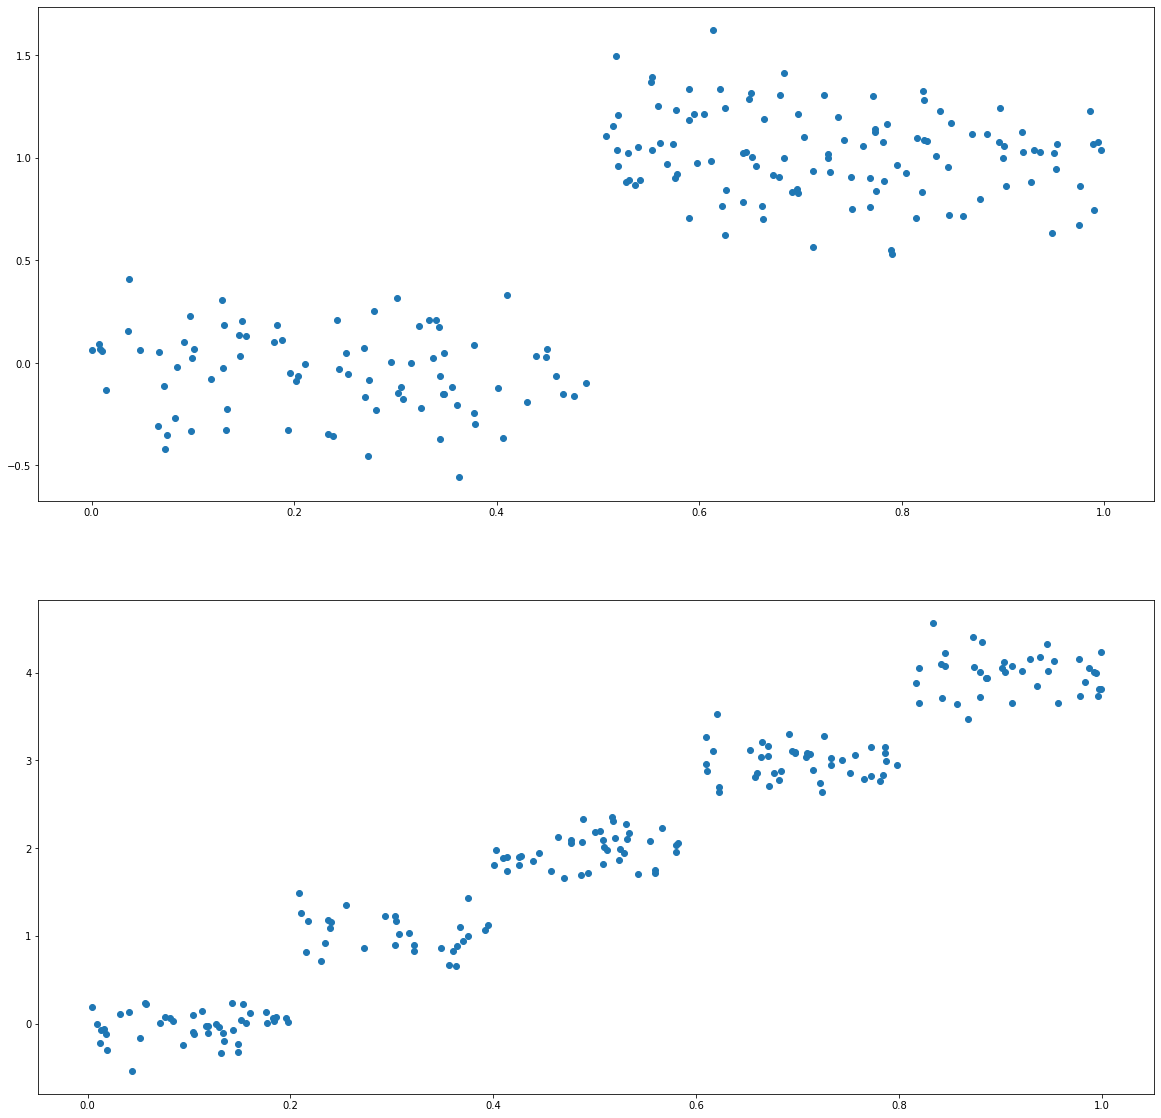

In [4]:
dataEx00 = regTree.loadDataset('ex00.txt')
dataEx0 = regTree.loadDataset('ex0.txt')
testsetEx2 = regTree.loadDataset('ex2test.txt')
fig, axes = plt.subplots(2, 1)
axes[0].scatter(dataEx00[:, 0], dataEx00[:, 1])
axes[1].scatter(dataEx0[:, 1], dataEx0[:, 2])

In [5]:
dataEx2 = regTree.loadDataset('ex2.txt')
myTreeEx2 = regTree.createTree(dataEx2, 1, 2)
print(myTreeEx2)

{'spIdx': 0, 'spValue': 0.499171, 'left': {'spIdx': 0, 'spValue': 0.457563, 'left': {'spIdx': 0, 'spValue': 0.126833, 'left': {'spIdx': 0, 'spValue': 0.108801, 'left': {'spIdx': 0, 'spValue': 0.085111, 'left': {'spIdx': 0, 'spValue': 0.068373, 'left': {'spIdx': 0, 'spValue': 0.044737, 'left': {'spIdx': 0, 'spValue': 0.028546, 'left': 0.6455060000000001, 'right': 7.537745999999999}, 'right': {'spIdx': 0, 'spValue': 0.055862, 'left': -8.4315975, 'right': -4.2326345}}, 'right': {'spIdx': 0, 'spValue': 0.080061, 'left': 15.824970500000001, 'right': 6.8442165}}, 'right': -9.178821000000001}, 'right': 11.761569}, 'right': {'spIdx': 0, 'spValue': 0.373501, 'left': {'spIdx': 0, 'spValue': 0.335182, 'left': {'spIdx': 0, 'spValue': 0.324274, 'left': {'spIdx': 0, 'spValue': 0.309133, 'left': {'spIdx': 0, 'spValue': 0.138619, 'left': -15.377877666666668, 'right': {'spIdx': 0, 'spValue': 0.156067, 'left': 7.4470665, 'right': {'spIdx': 0, 'spValue': 0.166765, 'left': {'spIdx': 0, 'spValue': 0.164134

In [6]:
prunedTree = regTree.pruning (myTreeEx2, testsetEx2)
print(prunedTree)

{'spIdx': 0, 'spValue': 0.499171, 'left': {'spIdx': 0, 'spValue': 0.457563, 'left': {'spIdx': 0, 'spValue': 0.126833, 'left': {'spIdx': 0, 'spValue': 0.108801, 'left': {'spIdx': 0, 'spValue': 0.085111, 'left': {'spIdx': 0, 'spValue': 0.068373, 'left': {'spIdx': 0, 'spValue': 0.044737, 'left': 4.091626, 'right': {'spIdx': 0, 'spValue': 0.055862, 'left': -8.4315975, 'right': -4.2326345}}, 'right': {'spIdx': 0, 'spValue': 0.080061, 'left': 15.824970500000001, 'right': 6.8442165}}, 'right': -9.178821000000001}, 'right': 11.761569}, 'right': {'spIdx': 0, 'spValue': 0.373501, 'left': {'spIdx': 0, 'spValue': 0.335182, 'left': {'spIdx': 0, 'spValue': 0.324274, 'left': {'spIdx': 0, 'spValue': 0.309133, 'left': {'spIdx': 0, 'spValue': 0.138619, 'left': -15.377877666666668, 'right': {'spIdx': 0, 'spValue': 0.156067, 'left': 7.4470665, 'right': {'spIdx': 0, 'spValue': 0.166765, 'left': -12.1079725, 'right': {'spIdx': 0, 'spValue': 0.193282, 'left': 9.5773855, 'right': {'spIdx': 0, 'spValue': 0.211

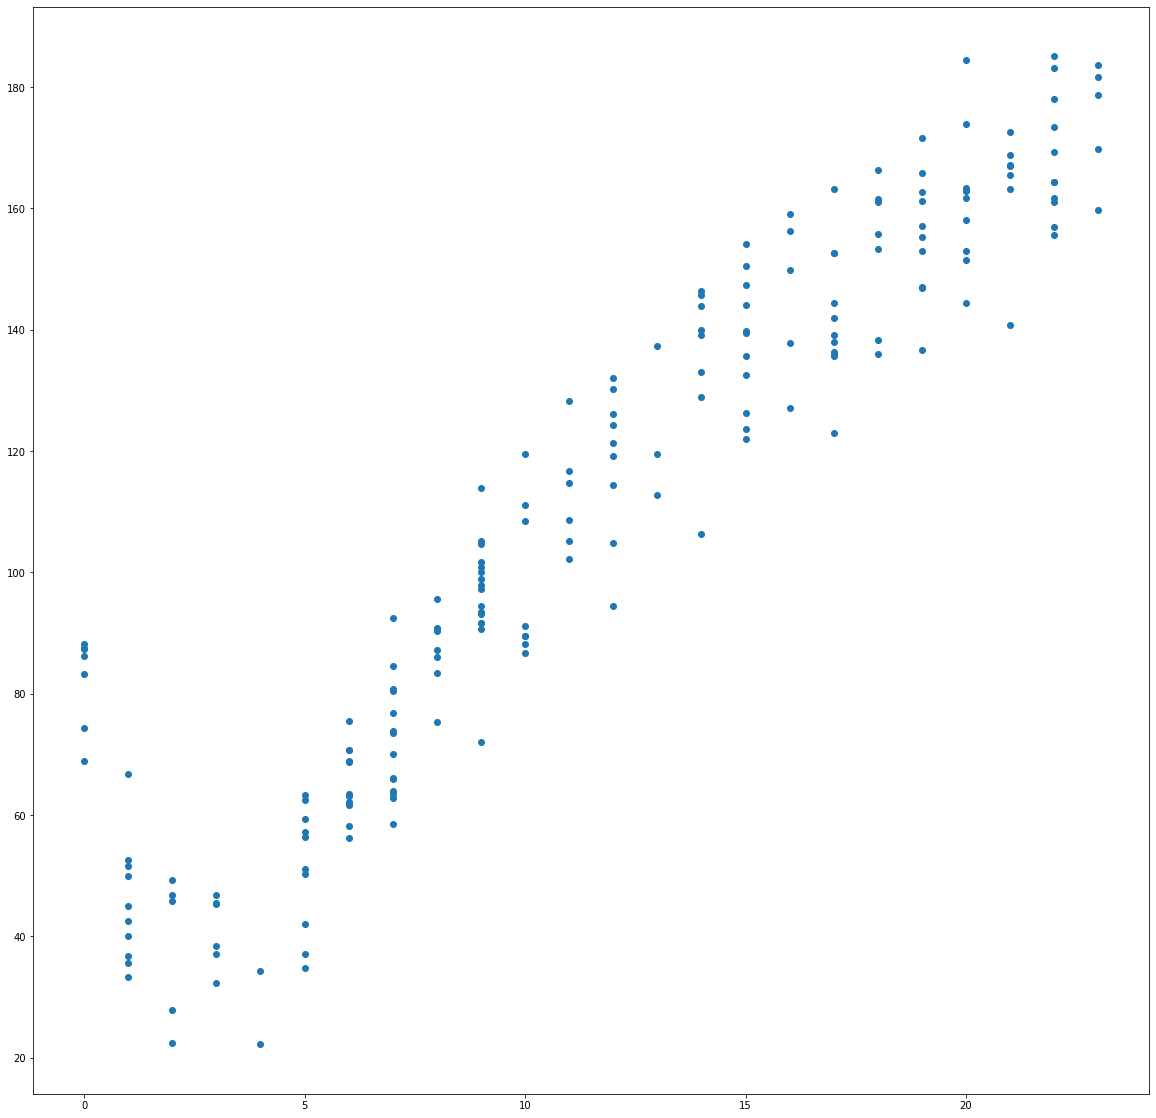

In [7]:
trainDat = regTree.loadDataset('bikeSpeedVsIq_train.txt')
testDat = regTree.loadDataset('bikeSpeedVsIq_test.txt')
plt.scatter(trainDat[:, 0], trainDat[:, 1])

In [8]:
treeModel = regTree.createTree(trainDat, 1, 20)
treeModel2 = regTree.pruning(treeModel, testDat)
estimateTree = regTree.createForecast(treeModel, testDat)
estimateTree2 = regTree.createForecast(treeModel2, testDat)

In [9]:
coef1 = np.corrcoef(estimateTree, testDat[:, -1], rowvar=0)[0, 1]  # 0.9631396452489377
coef1

0.9631396452489377

In [10]:
coef2 = np.corrcoef(estimateTree2, testDat[:, -1], rowvar=0)[0, 1]  # 0.9631396452489377
coef2

0.9631396452489377

In [11]:
estimateLR = regTree.forecastLR(trainDat, testDat)
coef3 = np.corrcoef(estimateLR, testDat[:, -1], rowvar=0)[0, 1]  #0.9434684235674764
coef3

0.9434684235674764